# fMRI Deconvolution Toolbox

Tutorial script to get started with the toolbox. 
Currently, the toolbox only supports two conditions that are alternating in a sequence such as A-B-A-B-A-B... where A and B represent a cue and a target respectively, similiar to attention related fMRI designs (Hopfinger 2000, Kastner 1999).

A future release will include support for multiple stimuli in a trial similar to a event related trial by trial fMRI design.  
&nbsp;  
*Authors: Soukhin Das (UC Davis) & Weigang Yi (UC Davis), 2022*

# Example to Test Null Ratios in Timecourses 

This example demonstrates how to plug the null ratios and determine what parameters suit best for the most optimal detection power/estimation efficiency of the timecourses.

# Table of Contents
* [Import necessary packages](#packages)
* [Load the Noise file](#introduction)
* [Specify parameters for Null Ratios](#generate_tcs)
* [Plot Optimality Outputs for Different Null Ratios](#plots)
* [References](#refs)

## Import necessary packages <a name="packages"></a>
The following cell block imports necessary modules from the toolbox to get started with.

In [7]:
import deconvolve
from tools import plotfs
import numpy as np


## Load the Noise file <a name="introduction"></a>
We start by loading in any 4D MRI rest scan file that can be readable by nibabel./n
Provide the path to the rest scan as input to the ```path``` variable.

In the backend, the file is loaded followed by extraction of different noise parameters from the signal using fMRIsim (Ellis et. al. 2020): physiological noise related to cardiac and respiratory activity, head/body movements, system and task-related noise, drift and autoregressive/ moving average (AMRA) noise related to the machine

/Users/sdas/Desktop/deconv/fmrisim_modified.py:1388: RuntimeWarning: Mean of empty slice
  auto_reg_rho = np.nanmean(auto_reg_rho_all, 0).tolist()
/Users/sdas/Desktop/deconv/fmrisim_modified.py:1389: RuntimeWarning: Mean of empty slice
  ma_rho = np.nanmean(ma_all, 0).tolist()


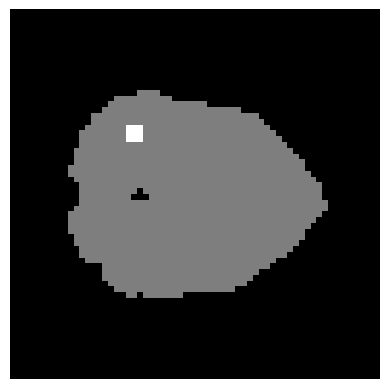

In [3]:
path = "/Users/sdas/Desktop/Participant_03_rest_run02.nii"
lv = deconvolve.load_noise(path)

## Specify parameters for Null Ratios <a name="generate_tcs"></a>

For the list of other parameters and their usage, refer to the ```deconvolve_optimization.ipynb``` notebook.  
***The following are the special parameters for this test***
* ```const_lisi```: This variable takes input for the fixed lower ISI.  
* ```lim_uisi```: This takes input for the limit to which upper ISI will be iterated.  
* ```null_ratios```: List of null ratios that need to be tested.  
* ```iterations```: Number of times the optimalities need to be calculated. The higher the number is, the more stable the outputs are.  


In [9]:
parameters = {
                "event_duration" : 0.1,
                "signal_mag": [2],
                "distribution" : "uniform",
                "dist_param" : None,
                "stim_ratio" : 1,
                "noise" :  False,
                "nonlinear" : True,
                "transient_load":'attn',
                "hrf_type":"double_gamma",
                "hrf_params":None
             }

const_lisi = 2 # Constant lower bound of ISI
lim_uisi = 20 # Limit of upper bound of ISI
null_ratios = np.array((0,0.1,0.2,0.3,0.4,0.5)) # The ratios that need to be tested
iterations = 5  #How many times will this be repeated

# Initializing empty arrays to store output
c1 = np.empty((iterations,len(null_ratios),lim_uisi - const_lisi + 1)) 
c2 = np.empty((iterations,len(null_ratios),lim_uisi - const_lisi + 1))

for i in range(5):
    p1, p2, result = deconvolve.run_null_experiment(const_lisi, lim_uisi, null_ratios, lv, parameters)
    c1[i] = p1
    c2[i] = p2

# Taking the mean across all repetitions.
det_pow = c1.mean(axis = 0).T
est_eff = c2.mean(axis = 0).T

Time elapsed: 5.551851749420166
Time elapsed: 5.767335891723633
Time elapsed: 5.272345781326294
Time elapsed: 6.23618221282959
Time elapsed: 6.2302868366241455


## Plot Optimality Outputs for Different Null Ratios <a name="plots"></a>

The following function ```plot_null_ratios``` takes in the output and plots the optimialites as a function of the constant lower ISI and variable upper ISIs.



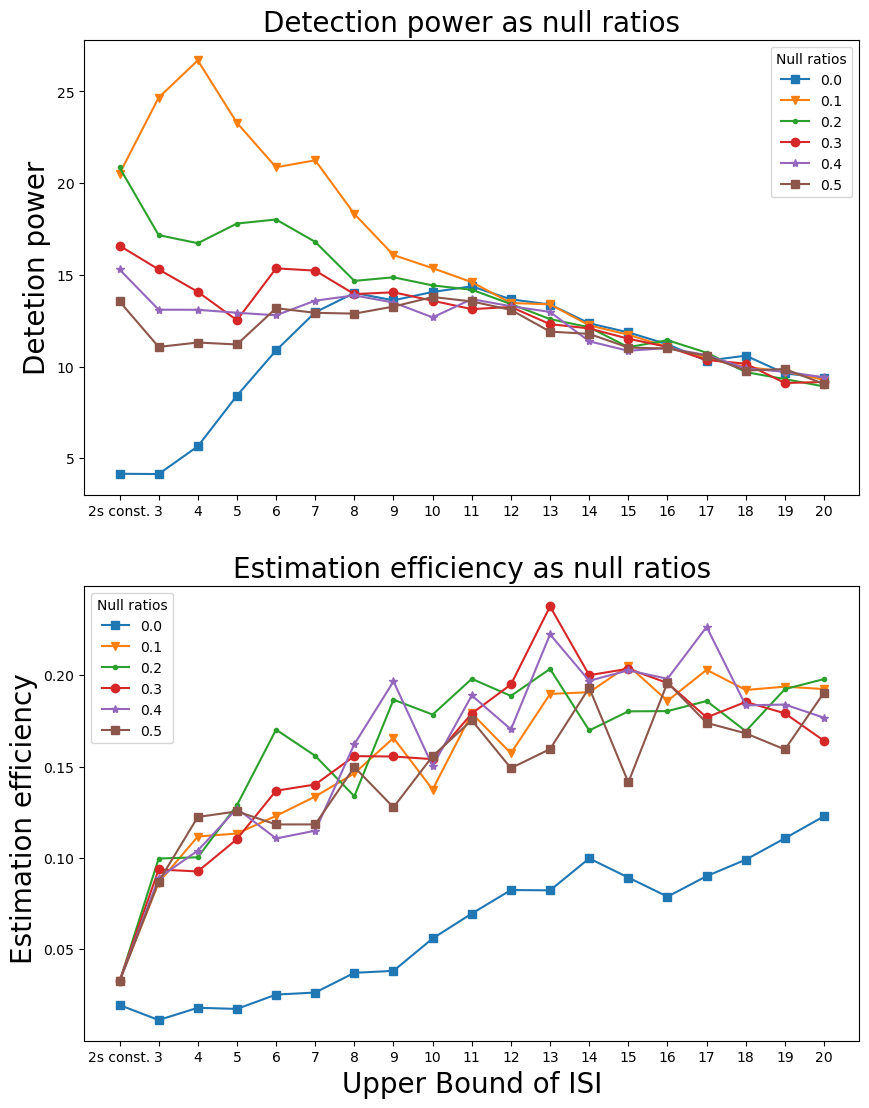

In [11]:
plotfs.plot_null_ratios(const_lisi, lim_uisi, null_ratios,det_pow,est_eff)


 ## References <a name="refs"></a>
1. Ellis, C. T., Baldassano, C., Schapiro, A. C., Cai, M. B., & Cohen, J. D. (2020). Facilitating open-science with realistic fMRI simulation: validation and application. PeerJ, 8, e8564. https://doi.org/10.7717/peerj.8564

2. Friston, K. J., Josephs, O., Rees, G., & Turner, R. (n.d.). Nonlinear Event-Related Responses in fMRI. 41–52.

3. Friston, K. J., Zarahn, E., Josephs, O., Henson, R. N. A., & Dale, A. M. (1999). Stochastic designs in event-related fMRI. NeuroImage, 10(5), 607–619. https://doi.org/10.1006/nimg.1999.0498